In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("../input/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [8]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.shape

(32561, 15)

In [10]:
df_folds = pd.read_csv("../input/adult_folds.csv")
df_folds.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,kfold
0,41,Private,200652,9th,5,Divorced,Other-service,Other-relative,White,Female,0,0,35,United-States,<=50K,0
1,26,Private,391349,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K,0
2,29,Private,29732,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,24,United-States,<=50K,0
3,48,Self-emp-not-inc,200471,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,0
4,51,Private,161838,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,57,United-States,<=50K,0


In [11]:
df_folds.kfold.value_counts()

0    6513
1    6512
2    6512
3    6512
4    6512
Name: kfold, dtype: int64

In [12]:
target_mapping = {
        "<=50K": 0,
        ">50K":1
    }
df.loc[:, "income"] = df.income.map(target_mapping)

In [13]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

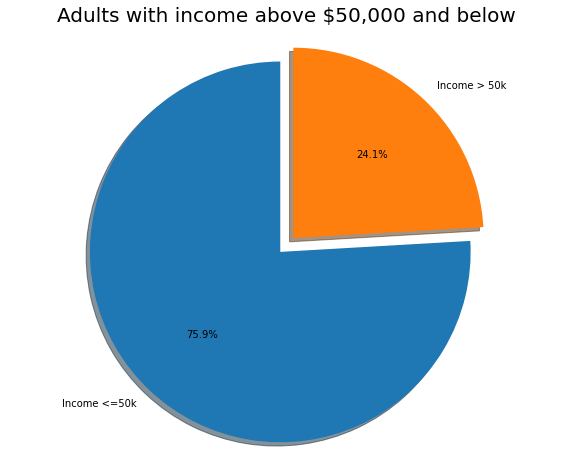

In [15]:
# Exploratory Data
# Gettinf the number of fraud transactions
#pie cart
labels = 'Income <=50k', 'Income > 50k'
size= [df.income[df['income'] ==0].count(), 
       df.income[df['income']==1].count() ]
explode = (0, 0.1)
fig1, ax1  = plt.subplots(figsize=(10,8))
ax1.pie(size, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Adults with income above $50,000 and below", size =20)
plt.show()

In [ ]:
#one hot encode first
ohe = preprocessing.OneHotEncoder()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
